In [ ]:
import flopy
import os
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import geopandas as gpd
import basic
import contextily as ctx
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import os
import matplotlib.pyplot as plt
import pathlib
import conda_scripts.plot_help as ph
from scipy.spatial.distance import pdist, squareform
from matplotlib import ticker

import write_inflows
import flopy.utils.binaryfile as bf

import warnings

In [ ]:
info, swr_info, sfr_info, riv_keys_info = basic.load_params('Base_model_long_07142023_constant_swrk_new_heads')

datestart = info['start_date']

name = info['name']

out_folder = basic.out_folder('June2016')


print(datestart)
print(out_folder)

In [ ]:
import conda_scripts.arich_functions as af

In [ ]:
basic

In [ ]:
grid = gpd.read_file("GIS/grid.shp")


In [ ]:
ml = basic.load_model()


In [ ]:
routing = gpd.read_file('GIS/nhd_hr_demo_sfr_routing.shp')

In [ ]:
sfr = gpd.read_file('GIS/nhd_hr_demo_sfr_cells.shp')
sfr = sfr.query("name=='Russian River'")

fig, ax  = basic.map_river(m = ml)

sfr.plot(ax = ax, color = 'r',zorder = 100)

In [ ]:
# bottom = 765


In [ ]:
# kper = None

In [ ]:
# def load_params():
    
#     import json

#     with open("model_params.txt") as json_data_file:
#         data = json.load(json_data_file)
    
#     info = data['calibration']
#     swr = data['calibration']['parameters']['SWR']
#     sfr = data['calibration']['parameters']['SFR']
#     riv_keys = data['riv_keys']
    
#     return info, swr, sfr, riv_keys



info, swr_info,sfr_info, riv_keys = basic.load_params(run_name = 'Base_model_long_07142023_constant_swrk_new_heads')
riv_keys

In [ ]:
swr_info

In [ ]:
IGEOTYPE = swr_info["IGEOTYPE"] 
IGCNDOP = swr_info["IGCNDOP" ]
GMANNING = swr_info["GMANNING" ]   
LEAKANCE = swr_info["LEAKANCE"]
getextd = swr_info["getextd"] 
bottom = swr_info['dam_swr_rno']
reach_min = swr_info["reach_main"]
IROUTETYPE = swr_info["IROUTETYPE"]
use_average_reach_len = swr_info["use_average_reach_len"]
use_thalweg = swr_info['use_thalweg']
kper = None if swr_info["kper"].lower()=='none' else swr_info["kper"]
SWR_processor = swr_info["SWR_processor"]
rain = swr_info['rain']
evap = swr_info['evap']

kper

In [ ]:

datestart = '1/1/2012'
enddate= '1/1/2022'

numdays = (pd.to_datetime(enddate) - pd.to_datetime(datestart)).days
rr, dry, mw, total, stg = write_inflows.run('Base_model_long_07142023_constant_swrk_new_heads', m = ml, minvalue=0, max_value = 100, numdays = numdays, datestart = '1/1/2012', cleandamdata = False)

In [ ]:
fig, ax = plt.subplots(figsize= (6,6))


def line(flow):
    
    minflow = 38
    yint = 28
    slope1 = .0023
    slope2 = .0005
    slope3 = .0002
    cutoff = 7000
    
    cutoff2 = 450000
    
    if flow < 500:
        return 28.5
    elif flow<cutoff:
        return yint+slope1*flow
    elif flow < cutoff2:
        return yint+13+slope2*flow
    else:
        return yint+26.5+slope3*flow
    
scatter = ax.scatter(stg.rrtotal, stg.Original_Value, c = stg.index.year, facecolor = 'None', marker = 'o', alpha = .9,cmap  = plt.get_cmap('tab20'))
ax.grid(True)
x = np.arange(1, 75000,500)
y = [line(xi) for xi in x]



l = ax.plot(x, y, 'r', marker = '.', label = 'Rating Curve')
# l = ax.plot(x, y2, 'r', marker = '.', label = 'Rating Curve Hacienda')

ax.set_xlabel('Russian River Discharge (Healdsburg + Dry Creek Flows) cfs')
ax.set_ylabel('RDS Observed Stage (ft)')
ax.set_title('Stage Discharge Relationship for\nEstimating Overland Flows Along Russian River')

legend1 = ax.legend(*scatter.legend_elements(),
                    title="Year", loc = 'lower right', bbox_to_anchor = (1,0))
ax.add_artist(legend1, )

plt.savefig('Overland_Flow/ovr_relationship.png', dpi = 300)
plt.savefig('versions/website_info/ovr_relationship.png', dpi = 300)

In [ ]:
stg.loc[:,'stage_est'] = stg.rrtotal.apply(line)

# stg = stg.loc['2019',:]

In [ ]:
stg.loc[:,'Original_Value':].plot(subplots = True,figsize = (10,10))


# if you want to make a stage-discharge curve from hacienda data, load the following

however this is not actually used because the manual approach works fine

In [ ]:

# this does the same as the following code
hacienda = pd.read_csv('Overland_Flow/hacienda_stage_flow.csv', index_col = [0], infer_datetime_format=True)
hacienda.index = pd.to_datetime(hacienda.index)

# # import hyriver
# from pygeohydro import NWIS
# dates = ("2000-01-01", "2010-12-31")

# stations = ['11467000']
# nwis = NWIS()
# qobs_ds = nwis.get_streamflow(stations, dates, to_xarray=True)

# stage = pd.DataFrame()
# for year in range(2010, 2022):
#     url = "https://nwis.waterservices.usgs.gov/nwis/iv/?sites=11467000&parameterCd=00065&startDT={:}-01-01T17:10:17.209-07:00&endDT={:}-12-31T17:10:17.209-07:00&siteStatus=all&format=rdb".format(
#         year, year+1
#     )
    
#     df = pd.read_csv(url, 
#                      comment = '#', 
#                      skiprows = [0],

#                      sep = '\t')
#     df = df.drop([0])
#     stage = pd.concat([df, stage])

# flow = pd.DataFrame()
# for year in range(2010, 2022):
#     url = "https://nwis.waterservices.usgs.gov/nwis/iv/?sites=11467000&parameterCd=00060&startDT={:}-01-01T17:10:17.209-07:00&endDT={:}-12-31T17:10:17.209-07:00&siteStatus=all&format=rdb".format(
#         year, year+1
#     )
    
#     df = pd.read_csv(url, 
#                      comment = '#', 
#                      skiprows = [0],

#                      sep = '\t')
#     df = df.drop([0])
#     flow = pd.concat([df, flow])

# flow

# s1 = stage.rename(columns = {'16448_00065':'stage'}).drop(columns= ['16448_00065_cd','tz_cd', 'site_no', 'agency_cd'])
# s1.loc[:,'datetime'] = pd.to_datetime(s1.loc[:,'datetime'])
# s1 = s1.astype({'stage':np.float})
# s1 = s1.set_index('datetime')
# stage_res = s1.resample('1D').mean()
# stage_res

# s1 = flow.rename(columns = {'16446_00060':'flow'}).drop(columns= ['16446_00060_cd','tz_cd', 'site_no', 'agency_cd'])
# s1.loc[:,'datetime'] = pd.to_datetime(s1.loc[:,'datetime'])
# s1 = s1.astype({'flow':np.float})
# s1 = s1.set_index('datetime')
# flow_res = s1.resample('1D').mean()
# flow_res

# hacienda = pd.merge(stage_res, flow_res, left_index = True, right_index = True)
# hacienda = hacienda.dropna()

In [ ]:
hacienda.plot.scatter(x = 'flow', y = 'stage')

# load the hacienda data
this not actually used because the manual approach seems fine

In [ ]:
x = hacienda.flow

y = hacienda.stage
# y = np.log(y)
plt.figure()
plt.scatter(x,y)
# np.polyfit(x.values, y.values,  2)
from scipy.optimize import curve_fit

def func(x, a, c, d):
    return a*np.exp(-c*x)+d

popt, pcov = curve_fit(func, x, y, p0=[4.5, 1/45,0])
# popt = [4.5, 4.5,0]
xpred = np.linspace(1,np.max(x),50)
y = [func(xi, popt[0], popt[1], popt[2]) for xi in xpred]

plt.scatter(xpred, y, label = 'log fig')

#manual version from above
yman = [line(xi)-28 for xi in xpred]
plt.scatter(xpred, yman, label = 'manual fig')

plt.title('stage discharge for Hacienda Bridge')
plt.legend()

In [ ]:

plt.figure( figsize = (6,6), dpi = 300)
ax = stg.loc[:,'stage_est'].plot( label = 'Estimated Stage')
stg.loc[:,'Original_Value'].plot( label = 'Actual Stage', ls = '--')
stg.query('stage_est>40').loc[:,'stage_est'].plot(ax = ax, marker = '.', ls = 'None', label = 'Stage Exceedance Events')
ax.set_ylabel('ft')
ax.axhline(40, c = 'k')
ax.text(1, 40,   'Cutoff', ha = 'left', va = 'center', transform = ax.get_yaxis_transform())
ax.axhline(28, c = 'brown')
ax.text(1, 28,   'Ground Surface', ha = 'left', va = 'center', transform = ax.get_yaxis_transform())

date = stg.stage_est.idxmax()+pd.to_timedelta(10, 'D')
maxvalue = stg.stage_est.max()
ax.set_ylim([25, 70])

ax.annotate('Offset Value', xy=(date, 28),
            ha = 'center',
             xycoords='data',
             xytext=(date, maxvalue),
             textcoords='data',
             arrowprops=dict(arrowstyle= '|-|',
                             color='blue',
                             lw=3,
                             ls='--')
           )

ax.set_title("RDS Estimated Stage")

ax.legend()

plt.savefig('Overland_Flow/stage_exceedance.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('versions/website_info/stage_exceedance.png', dpi = 300, bbox_inches = 'tight')

# get the stream elevations from the actual model top.
# get the flood elevations from the filled ponds

In [ ]:
filled = np.genfromtxt("GIS/lay_1_top_filled_ponds.csv",delimiter = ',')
filled

In [ ]:
sfr = gpd.read_file('GIS/nhd_hr_demo_sfr_cells.shp')
sfr.loc[:,'model_top'] = ml.dis.top.array[sfr.loc[:,'i'], sfr.loc[:,'j']]
# sfr.loc[:,'model_top_filled'] = filled[sfr.loc[:,'i'], sfr.loc[:,'j']]
sfr.filter(regex = 'top|geometry').explore('model_top')

In [ ]:
grid = gpd.read_file("GIS/grid.shp")

# need to update model top for streambed locations
grid.loc[:,'model_top'] = ml.dis.top.array[grid.loc[:,'row']-1, grid.loc[:,'column']-1]
grid.loc[:,'ibound'] = ml.bas6.ibound.array[0][grid.loc[:,'row']-1, grid.loc[:,'column']-1]
grid.loc[:,'model_top_filled'] = filled[grid.loc[:,'row']-1, grid.loc[:,'column']-1]

m = grid.query("ibound==1").explore('model_top',vmax = 75, vmin = 30)
sfr.set_geometry(sfr.geometry.centroid).explore( m=m)

In [ ]:
import leafmap
import whiteboxgui

In [ ]:



# whiteboxgui.show()


# this is how the dem was filled for the quarry ponds

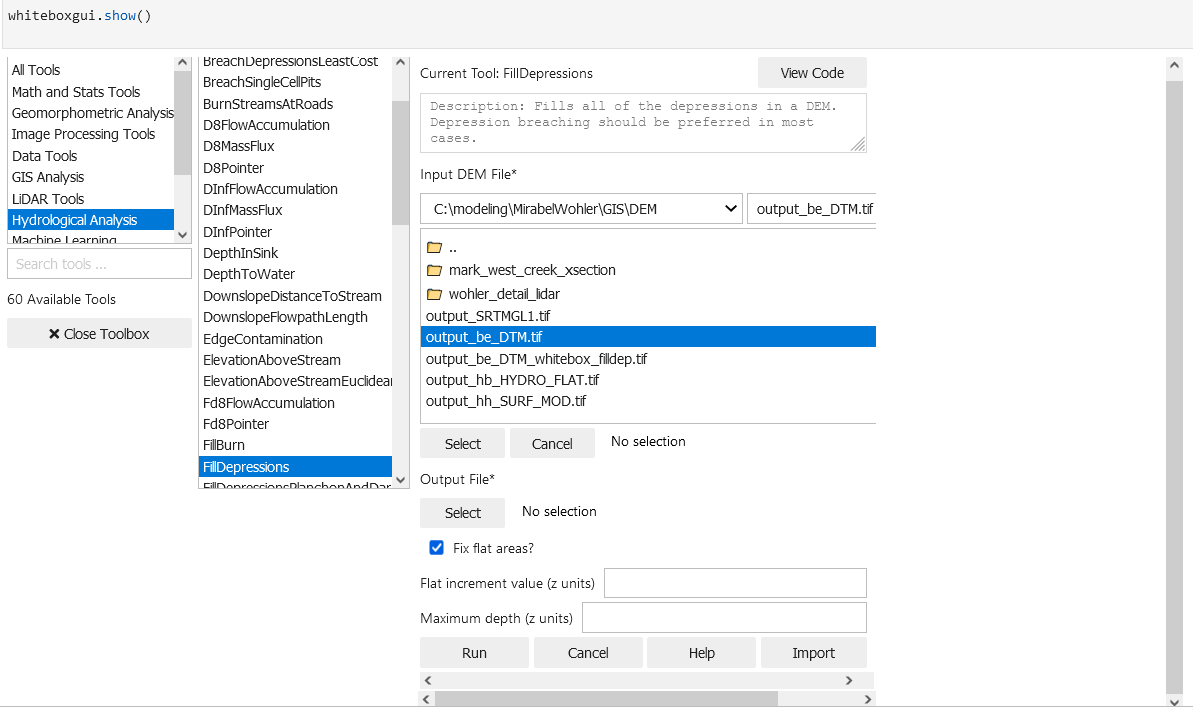

In [ ]:
# grid_simp = grid.query("ibound==1").loc[:,['model_top','node','geometry']].rename(columns ={'node':'node_grid'})
grid_simp = grid.query("ibound==1").loc[:,['model_top_filled','node','geometry']].rename(
    columns ={'node':'node_grid'})
sfr_simp = sfr.set_geometry(sfr.geometry.centroid).loc[:,[ 'geometry', 'node', 'iseg', 'ireach']].rename(columns ={'node':'node_sfr'}).drop_duplicates('node_sfr')

gridnear = gpd.sjoin_nearest(grid_simp,
                            sfr_simp,
                            how = 'left')

print(f"shape {gridnear.shape[0]}")
gridnear = gridnear.drop_duplicates('node_grid')
print(f"shape {gridnear.shape[0]}")

In [ ]:
sfr_simp

In [ ]:
dfall = pd.DataFrame()
for date, row in stg.query('stage_est>40').iterrows():
    s = sfr.copy().drop_duplicates('node').loc[:,['model_top', 'node']].rename(columns = {'node':'node_sfr'})
    s.loc[:,'Date'] = date
    s.loc[:,'offset'] = row['stage_est']-28
    s.loc[:,'WSE'] = s.loc[:,'model_top'] + s.loc[:,'offset']
    s = s.drop(columns = 'model_top')
    # dfall = dfall.append(s)
    dfall = pd.concat([dfall, s])
    


In [ ]:
stg.query('stage_est>40').plot(marker = '.',ls = '',x = 'Original_Value', y = 'stage_est')

In [ ]:
dfall

In [ ]:
floods = pd.merge(dfall, gridnear, on = 'node_sfr')

floods = floods.query("WSE>model_top_filled")

fig = plt.figure(figsize = (6,6), dpi =300)
ax = floods.groupby('Date').count().loc[:,'WSE'].plot(marker = 'o', ls = 'None')
ax.grid(True)
ax.set_title('Number of Overland flow events')
ax.set_ylabel('Number of cells with overland flow events')
ax.set_xlabel('')
plt.savefig('Overland_Flow/stage_exceedance_count_filled.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('versions/website_info/stage_exceedance_count_filled.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# floods = pd.merge(dfall, gridnear, on = 'node_sfr')

# floods = floods.query("WSE>model_top")

# fig = plt.figure(figsize = (6,6), dpi =300)
# ax = floods.groupby('Date').count().loc[:,'WSE'].plot(marker = 'o', ls = 'None')
# ax.grid(True)
# ax.set_title('Number of Overland flow events')
# ax.set_ylabel('Number of cells with overland flow events')
# ax.set_xlabel('')
# plt.savefig('Overland_Flow/stage_exceedance_count_filled.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('versions/website_info/stage_exceedance_count_filled.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
floods.shape

In [ ]:
# cnts = gpd.read_file("C:\modeling\MirabelWohler\GIS\DEM\wohler_detail_lidar\contourfile.shp")

In [ ]:
import conda_scripts.utils.folium_maps as fm

In [ ]:
floods_sum = pd.merge(floods.drop(columns = 'geometry').groupby('node_grid').count().reset_index().loc[:,['node_grid','WSE']], 
                      gridnear.drop_duplicates('node_grid').loc[:,['node_grid', 'geometry','model_top_filled', 'node_sfr']], 
                      on = 'node_grid', how = 'right')
# floods_sum = floods_sum.fillna(0)
floods_sum = floods_sum.rename(columns = {'WSE': 'Number of flood days'})
floods_sum = gpd.GeoDataFrame(floods_sum, geometry = 'geometry', crs = 2226)
m = floods_sum.explore('Number of flood days', tooltip  = ['Number of flood days', 'model_top_filled', 'node_sfr'], name = 'Number of flood days')

# gridnear.explore('model_top',tooltip  = [ 'model_top'], m = m, name = 'gridnerar', vmin = 20, vmax = 75)
# sfr.explore( 'model_top', m=m, color= 'r', name = 'sfr', vmin = 20, vmax = 75)
sfr.set_geometry(sfr.geometry.centroid).explore( m=m, color= 'r', name = 'SFR Cells')
fm.add_layers(m)
fm.add_title('Number of Overland Flow Events per Cell, from 2012 to 2021',m)
m.save('versions/website_info/overland_flow_count_filled_ponds.html')
m.save('Overland_Flow//overland_flow_count_filled_ponds.html')
m
# cnts.explore(m = m)

In [ ]:
floods.sort_values(['Date', 'node_grid']).loc[:,['Date','node_grid','WSE', 'model_top_filled']].to_csv('Overland_Flow/overland_flow_ts_filled_ponds.csv',
                                                                                                float_format="%.0f",index = False)

In [ ]:
def read_overland(m):
    ovr = pd.read_csv('Overland_Flow/overland_flow_ts_filled_ponds.csv', index_col = [0],parse_dates=True )
    ovr.loc[:, ['k','i', 'j']] = m.dis.get_lrc(list(ovr.loc[:,'node_grid'].values))
    
    return ovr

ovr = read_overland(ml)

In [ ]:
1000*86400/43560

In [ ]:
def plot_ovr(ovr, datestart, folder, recharge_rate, numdays = 365):
    
    q = ovr.groupby(ovr.index).count().loc[:,['WSE']] * 200*200*recharge_rate/43560
    end_date = (pd.to_datetime(datestart ) + pd.to_timedelta(numdays+5, 'D')).strftime('%m/%d/%Y')
    q = q.resample('1D').sum()
    qm = q.max()
    q = q.loc[datestart:end_date,:].rename(columns = {'WSE':"Overland Recharge"})
    plt.figure( figsize = (6,6), dpi =300)
    ax = q.plot(drawstyle="steps-post", linewidth=2, ylabel = 'recharge (acre-feet)', c = 'b')
    ax.set_ylim([0, qm.values[0]]); 
    ax.grid(True); 
    ax.yaxis.get_label().set_color('b')
    # ax.text(1,1, f'Recharge rate = {recharge_rate}ft.', transform = ax.transAxes, ha = 'right', va = 'bottom')
    ax.legend().remove()
    ax.set_title(f'Daily Recharge from Overland Flow.\nRecharge rate = {recharge_rate}ft/d')
    
    ax2 = ax.twinx()
    
    p2 = q.cumsum().plot(ax = ax2, label = 'Cumulative', c = 'r', ylabel = 'cumulative recharge (acre-feet)')
    ax.get_yaxis().set_major_formatter(
            ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    ax2.get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    ax2.yaxis.get_label().set_color('r')
    
    plt.savefig(os.path.join(folder, 'ovr_total_filled_ponds.png'), bbox_inches = 'tight', dpi = 250,)
    
    return ax

for year in range(2012, 2021):
    z = plot_ovr(ovr, f'1/1/{year}', f'versions/June{year}', 0.5)

In [ ]:
gridnear.explore('node_sfr')